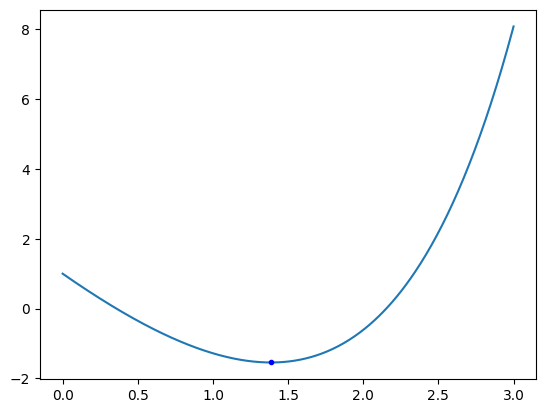

False 15


In [1]:
from re import X
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
from scipy.optimize import linesearch
from autograd import numpy as anp
from autograd import grad

# Problem 1
def golden_section(f, a, b, tol=1e-5, maxiter=15):
    """Use the golden section search to minimize the unimodal function f.

    Parameters:
        f (function): A unimodal, scalar-valued function on [a,b].
        a (float): Left bound of the domain.
        b (float): Right bound of the domain.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    x0 = (a + b) / 2              #set the initial minimizer approximation
    phi = (1 + np.sqrt(5)) / 2    #calculate the golden ratio
    iters = 0
    converged = False             #track whether converges or not

    for i in range(maxiter):
        c = (b - a) / phi
        a_squig = b - c
        b_squig = a + c
        iters += 1
        if f(a_squig) <= f(b_squig):      #get new boundaries for the search interval
            b = b_squig

        else:
            a = a_squig
        x1 = (a + b) / 2               #Set the minimizer approximation as the interval midpoint
        if np.abs(x0 - x1) < tol:
            converged = True
            break                      #Stop iterating if the approximation stops changing enough
        
        x0 = x1

    return x1, converged, iters

    

def test1():
    f = lambda x: np.exp(x) - 4 * x
    min, con, it = golden_section(f, 0, 3)
    domain = np.linspace(0, 3, 500)
    plt.plot(domain, f(domain))
    plt.plot(min, f(min), 'b.')
    plt.show()
    print(con, it)
test1()

In [2]:
# Problem 2
def newton1d(df, d2f, x0, tol=1e-5, maxiter=15):
    """Use Newton's method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        d2f (function): The second derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    iters = 0               #count the number of iterations
    converged = False       #set the bool regarding convergence to false
    for k in range(maxiter):
        x1 = x0 - (df(x0) / d2f(x0))
        iters += 1                              #apply Newton's Method until we are within the tolerance or until we have reached the max iterations
        if np.abs(x1 - x0) < tol:
            converged = True              #mark the bool to true if it converges
            break 
        x0 = x1

    return x1, converged, iters

def test2():
    df = lambda x : 2*x + 5*np.cos(5*x)
    d2f = lambda x : 2 - 25*np.sin(5*x)
    print(newton1d(df, d2f, 0, tol=1e-10, maxiter=500))
    print('\n')
    print(opt.newton(df, x0=0, fprime=d2f, tol=1e-10, maxiter=500))
test2()

(-1.4473142236328096, True, 49)


-1.4473142236328096


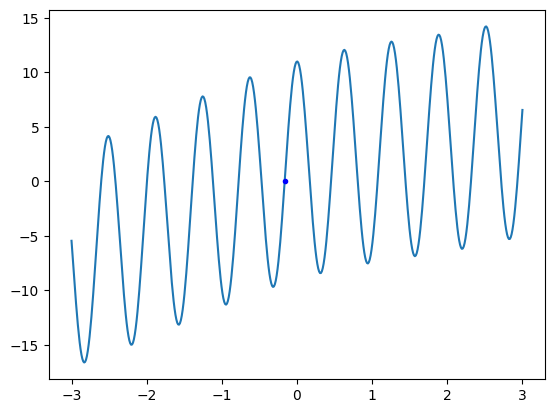

In [5]:
# Problem 3
def secant1d(df, x0, x1, tol=1e-5, maxiter=15):
    """Use the secant method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        x1 (float): Another guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    iters = 0
    converged = False
    for i in range(maxiter):
        x2 = (x0 * df(x1) - x1 * df(x0)) / (df(x1) - df(x0))
        iters += 1                              #apply secant method until we are within the tolerance or until we have reached the max iterations
        if np.abs(x2 - x1) < tol:
            converged = True              #mark the bool to true if it converges
            break
        x0 = x1                            #reassign each variable
        x1 = x2

    return x2, converged, iters

def test3():
    df = lambda x: 2*x + np.cos(x) + 10*np.cos(10*x)
    min = secant1d(df, 0, -1, tol=1e-10, maxiter=500)[0]
    domain = np.linspace(-3, 3, 500)
    plt.plot(domain, df(domain))
    plt.plot(min, df(min), 'b.')
    plt.show()
test3()

In [6]:
# Problem 4
def backtracking(f, Df, x, p, alpha=1, rho=.9, c=1e-4):
    """Implement the backtracking line search to find a step size that
    satisfies the Armijo condition.

    Parameters:
        f (function): A function f:R^n->R.
        Df (function): The first derivative (gradient) of f.
        x (float): The current approximation to the minimizer.
        p (float): The current search direction.
        alpha (float): A large initial step length.
        rho (float): Parameter in (0, 1).
        c (float): Parameter in (0, 1).

    Returns:
        alpha (float): Optimal step size.
    """
    Dfp = Df(x) @ p       #compute these values only once
    fx = f(x)

    while (f(x + alpha * p) > (fx + c*alpha*Dfp)):      #continue under the given circumstances
        alpha = rho * alpha

    return alpha                     #return the optimal step size

def test4():
    f = lambda x: x[0]**2 + x[1]**2 + x[2]**2
    Df = lambda x: np.array([2*x[0], 2*x[1], 2*x[2]])
    x = anp.array([150., .03, 40.])
# Current minimizer guesss.
    p = anp.array([-.5, -100., -4.5])
# Current search direction.
    phi = lambda alpha: f(x + alpha*p)
# Define phi(alpha).
    dphi = grad(phi)
    alpha, _ = linesearch.scalar_search_armijo(phi, phi(0.), dphi(0.))

    print(alpha)
    print('\n')
    print(backtracking(f, Df, x, p))
test4()

0.025747218202684496


0.04710128697246249
